# Kaggle
## Competição DSA de Machine Learning - Dezembro 2019

## EDA Notebook

#### Upvote se esse notebook for util

In [1]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Utils
import pandasql as ps
import re 
import math, string, os
import datetime

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 200
pd.options.display.max_rows = 200
pd.set_option('display.max_columns', None)
import gc
gc.enable()

# Variavel para controlar o treinamento no Kaggle
TRAIN_OFFLINE = True

In [2]:
def read_data():
    
    if TRAIN_OFFLINE:
        print('Carregando arquivo dataset_treino.csv....')
        train = pd.read_csv('../dataset/dataset_treino.csv')
        print('dataset_treino.csv tem {} linhas and {} colunas'.format(train.shape[0], train.shape[1]))
        
        print('Carregando arquivo dataset_teste.csv....')
        test = pd.read_csv('../dataset/dataset_teste.csv')
        print('dataset_teste.csv tem {} linhas and {} colunas'.format(test.shape[0], test.shape[1]))
        
        
        print('Carregando arquivo sample_submission.csv....')
        sample_submission = pd.read_csv('../dataset/sample_submission.csv')
        print('sample_submission.csv tem {} linhas and {} colunas'.format(sample_submission.shape[0], sample_submission.shape[1]))
    else:
        print('Carregando arquivo dataset_treino.csv....')
        train = pd.read_csv('/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_treino.csv')
        print('dataset_treino.csv tem {} linhas and {} colunas'.format(train.shape[0], train.shape[1]))
        
        print('Carregando arquivo dataset_treino.csv....')
        test = pd.read_csv('/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_teste.csv')
        print('dataset_teste.csv tem {} linhas and {} colunas'.format(test.shape[0], test.shape[1]))

        print('Carregando arquivo dataset_treino.csv....')
        sample_submission = pd.read_csv('/kaggle/input/competicao-dsa-machine-learning-dec-2019/sample_submission.csv')
        print('sample_submission.csv tem {} linhas and {} colunas'.format(sample_submission.shape[0], sample_submission.shape[1]))
    
    return train, test, sample_submission

In [3]:
# Leitura dos dados
train, test, sample_submission = read_data()

Carregando arquivo dataset_treino.csv....
dataset_treino.csv tem 114321 linhas and 133 colunas
Carregando arquivo dataset_teste.csv....
dataset_teste.csv tem 114393 linhas and 132 colunas
Carregando arquivo sample_submission.csv....
sample_submission.csv tem 114393 linhas and 2 colunas


# 1. ANALISE GERAL

In [4]:
# Visualizando os primeiros registros do dataset
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [5]:
# Visualizando os tipos das features
train.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22        object
v23       float64
v24        object
v25       float64
v26       float64
v27       float64
v28       float64
v29       float64
v30        object
v31        object
v32       float64
v33       float64
v34       float64
v35       float64
v36       float64
v37       float64
v38         int64
v39       float64
v40       float64
v41       float64
v42       float64
v43       float64
v44       float64
v45       float64
v46       float64
v47        object
v48       float64
v49       float64
v50       float64
v51       float64
v52        object
v53       float64
v54       

In [6]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,5.728000e+04,1.141890e+05,1.712060e+05,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,9.135798e-01,1.469550e+00,2.136128e+00,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428e+00,7.023803e+00,9.465497e+00,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398e+00,4.205991e+00,4.833250e+00,20.000000
v5,65697.0,8.742359,2.036018,-5.287068e-07,7.605918e+00,8.670867e+00,9.771353e+00,20.000000
v6,64489.0,2.436402,0.599965,-9.055091e-07,2.065064e+00,2.412790e+00,2.775285e+00,20.000001
v7,64489.0,2.483921,0.589449,-9.468765e-07,2.101477e+00,2.452166e+00,2.834285e+00,20.000000
v8,65702.0,1.496569,2.783003,-7.783778e-07,8.658986e-02,3.860317e-01,1.625246e+00,20.000001
v9,64470.0,9.031859,1.930262,-9.828757e-07,7.853659e+00,9.059582e+00,1.023256e+01,20.000001


# 2. DATA MISSING

In [7]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [8]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:133]

Percent of missing data


[('v30', 52.58),
 ('v113', 48.38),
 ('v102', 44.89),
 ('v23', 44.33),
 ('v51', 44.33),
 ('v85', 44.33),
 ('v119', 44.33),
 ('v123', 44.33),
 ('v16', 43.64),
 ('v69', 43.64),
 ('v78', 43.64),
 ('v115', 43.64),
 ('v131', 43.64),
 ('v9', 43.61),
 ('v80', 43.61),
 ('v122', 43.61),
 ('v19', 43.6),
 ('v20', 43.6),
 ('v37', 43.6),
 ('v65', 43.6),
 ('v92', 43.6),
 ('v95', 43.6),
 ('v97', 43.6),
 ('v118', 43.6),
 ('v121', 43.6),
 ('v130', 43.6),
 ('v1', 43.59),
 ('v6', 43.59),
 ('v7', 43.59),
 ('v11', 43.59),
 ('v13', 43.59),
 ('v15', 43.59),
 ('v18', 43.59),
 ('v26', 43.59),
 ('v27', 43.59),
 ('v28', 43.59),
 ('v29', 43.59),
 ('v32', 43.59),
 ('v33', 43.59),
 ('v35', 43.59),
 ('v39', 43.59),
 ('v41', 43.59),
 ('v42', 43.59),
 ('v43', 43.59),
 ('v45', 43.59),
 ('v49', 43.59),
 ('v53', 43.59),
 ('v55', 43.59),
 ('v57', 43.59),
 ('v58', 43.59),
 ('v60', 43.59),
 ('v67', 43.59),
 ('v68', 43.59),
 ('v73', 43.59),
 ('v77', 43.59),
 ('v83', 43.59),
 ('v84', 43.59),
 ('v86', 43.59),
 ('v88', 43.59),
 

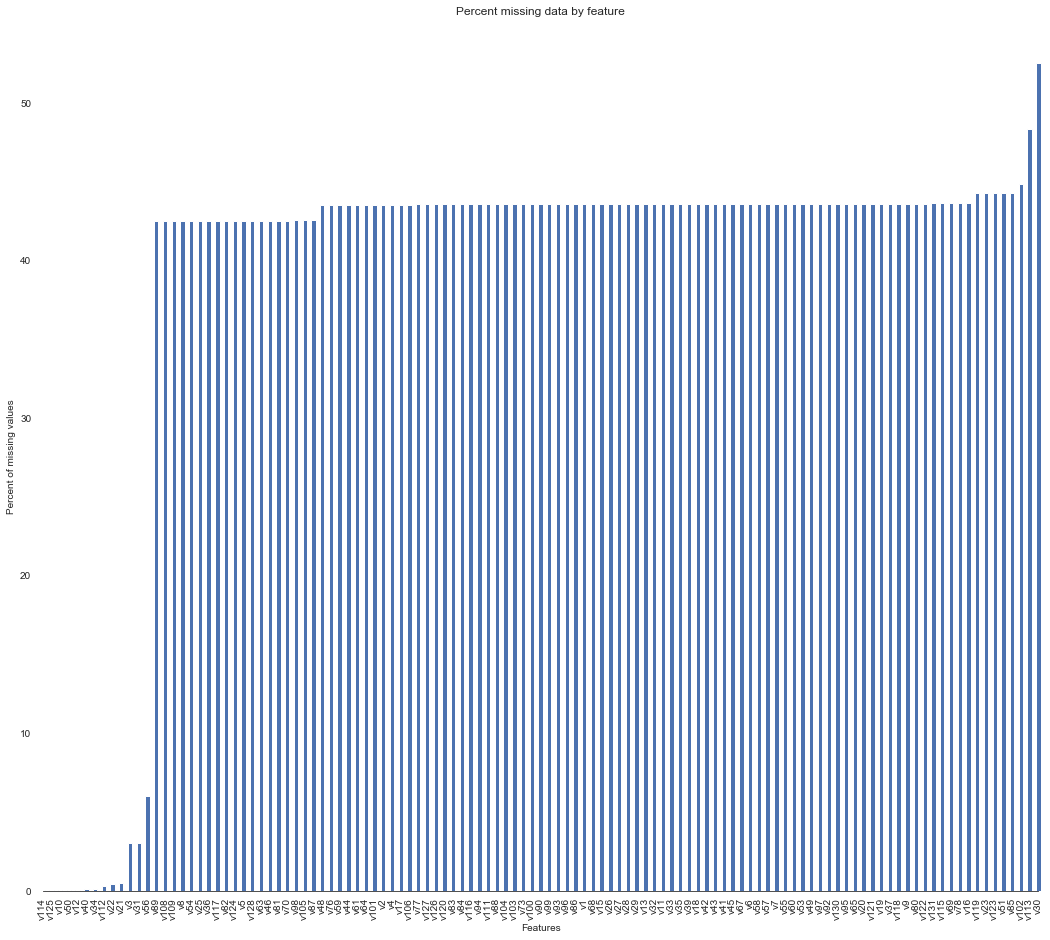

In [9]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 16))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [10]:
# Funcao para tratar os dados missing de cada variavel
def fill_na(data):
    data.fillna(data.mean(),inplace=True)

# Criando as funções auxiliares de limpeza e conversao

In [11]:
# Funcao para criar um plot de distribuicao para cada feature
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    """
    Plot distributions for each column in a dataset.
    Seaborn countplots are used for categorical data and distplots for numerical data

    args:
    ----
    dataset {dataframe} - the data that will be plotted
    cols {int} - how many distributions to plot for each row
    width {int} - how wide each plot should be
    height {int} - how tall each plot should be
    hspace {float} - horizontal space between plots
    wspace {float} - vertical space between plots 
    """
    # plot styling
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    # calculate rows needed
    rows = math.ceil(float(dataset.shape[1]) / cols)
    # create a countplot for top 20 categorical values
    # and a distplot for all numerical values
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            # grab the top 10 for each countplot
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            # make labels only 20 characters long and rotate x labels for nicer displays
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Resolvendo missing values e realizando limpeza das features

In [12]:
# Primeiro, vou preencher os dados missing com a media (apenas para iniciar as analises)
fill_na(train)

# Analisando Correlacoes

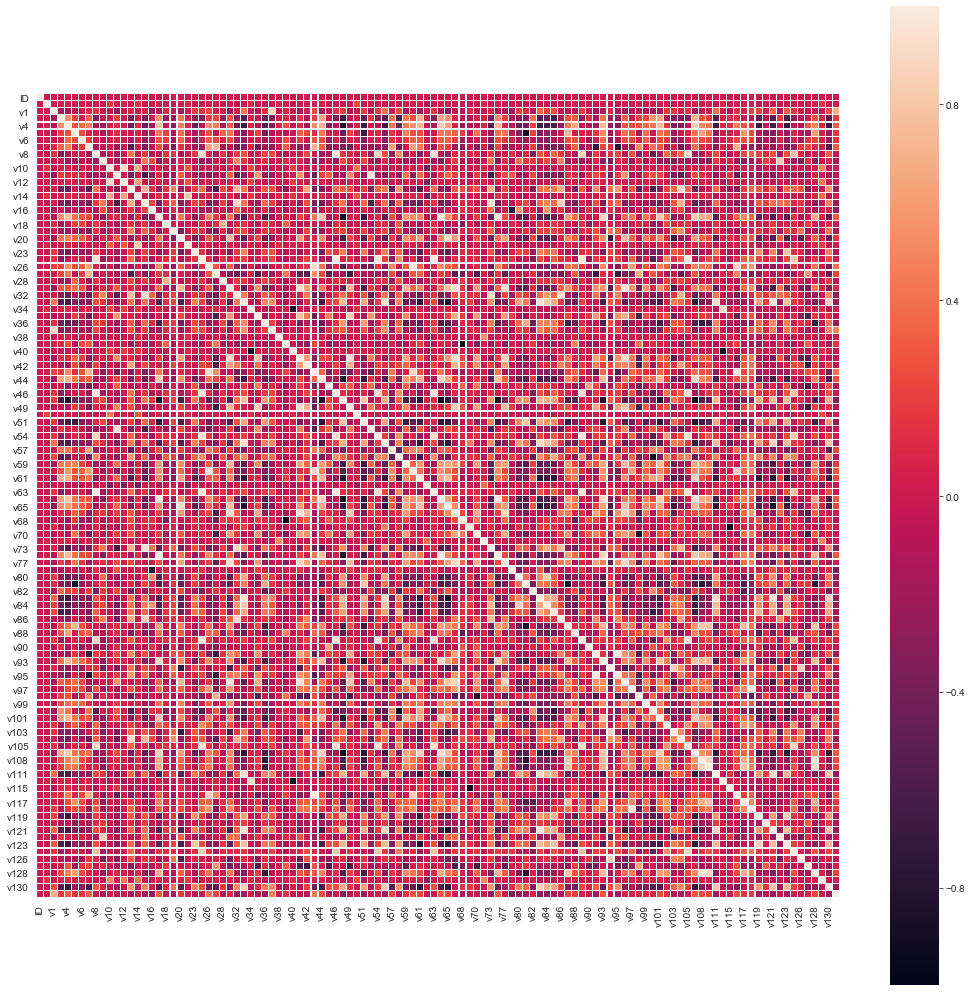

In [13]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=False)

# 3. Analisando todas as features do dataset

### Analisando a variavel target

In [14]:
# Descricao: é igual a 1 para indenizações que podem ser aprovadas rapidamente.
train['target'].describe()

count    114321.000000
mean          0.761199
std           0.426353
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

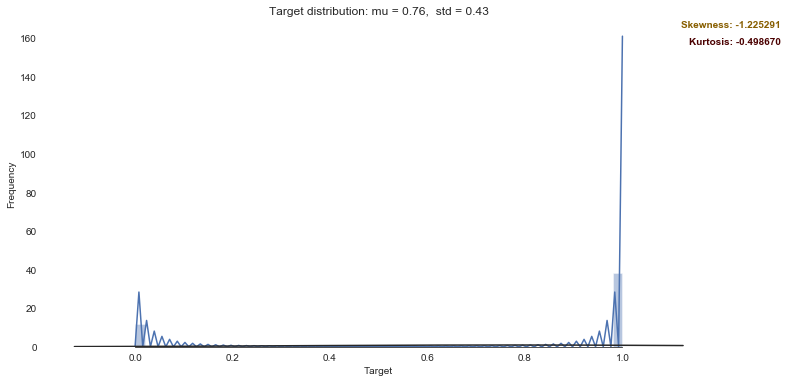

In [15]:
# Analisando a variavel target
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 6))

# Fit a normal distribution
mu, std = norm.fit(train["target"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["target"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Target")
ax.set(title="Target distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["target"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["target"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

,target,%
1,87021,76.119873
0,27300,23.880127


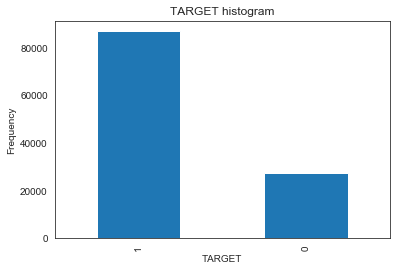

In [16]:
# Existe um problema de desbalanceamento de classes, ou seja, volume maior de um dos tipos de classe. 
# Podemos ver abaixo que existe uma clara desproporção 
# Apenas 23% sao indenizacoes que nao podem ser aprovadas rapidamente

# Visualizando a distribuição das classes (variavel TARGET)
pd.value_counts(train['target']).plot.bar()
plt.title('TARGET histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')

# Visualizando um df com quantidade e percentual da variavel TARGET
df = pd.DataFrame(train['target'].value_counts())
df['%'] = 100*df['target']/train.shape[0]
df

### Analisando as demais variáveis

In [17]:
# Primeiro, vamos remover a coluna ID
train.drop(['ID'], axis=1, inplace=True)

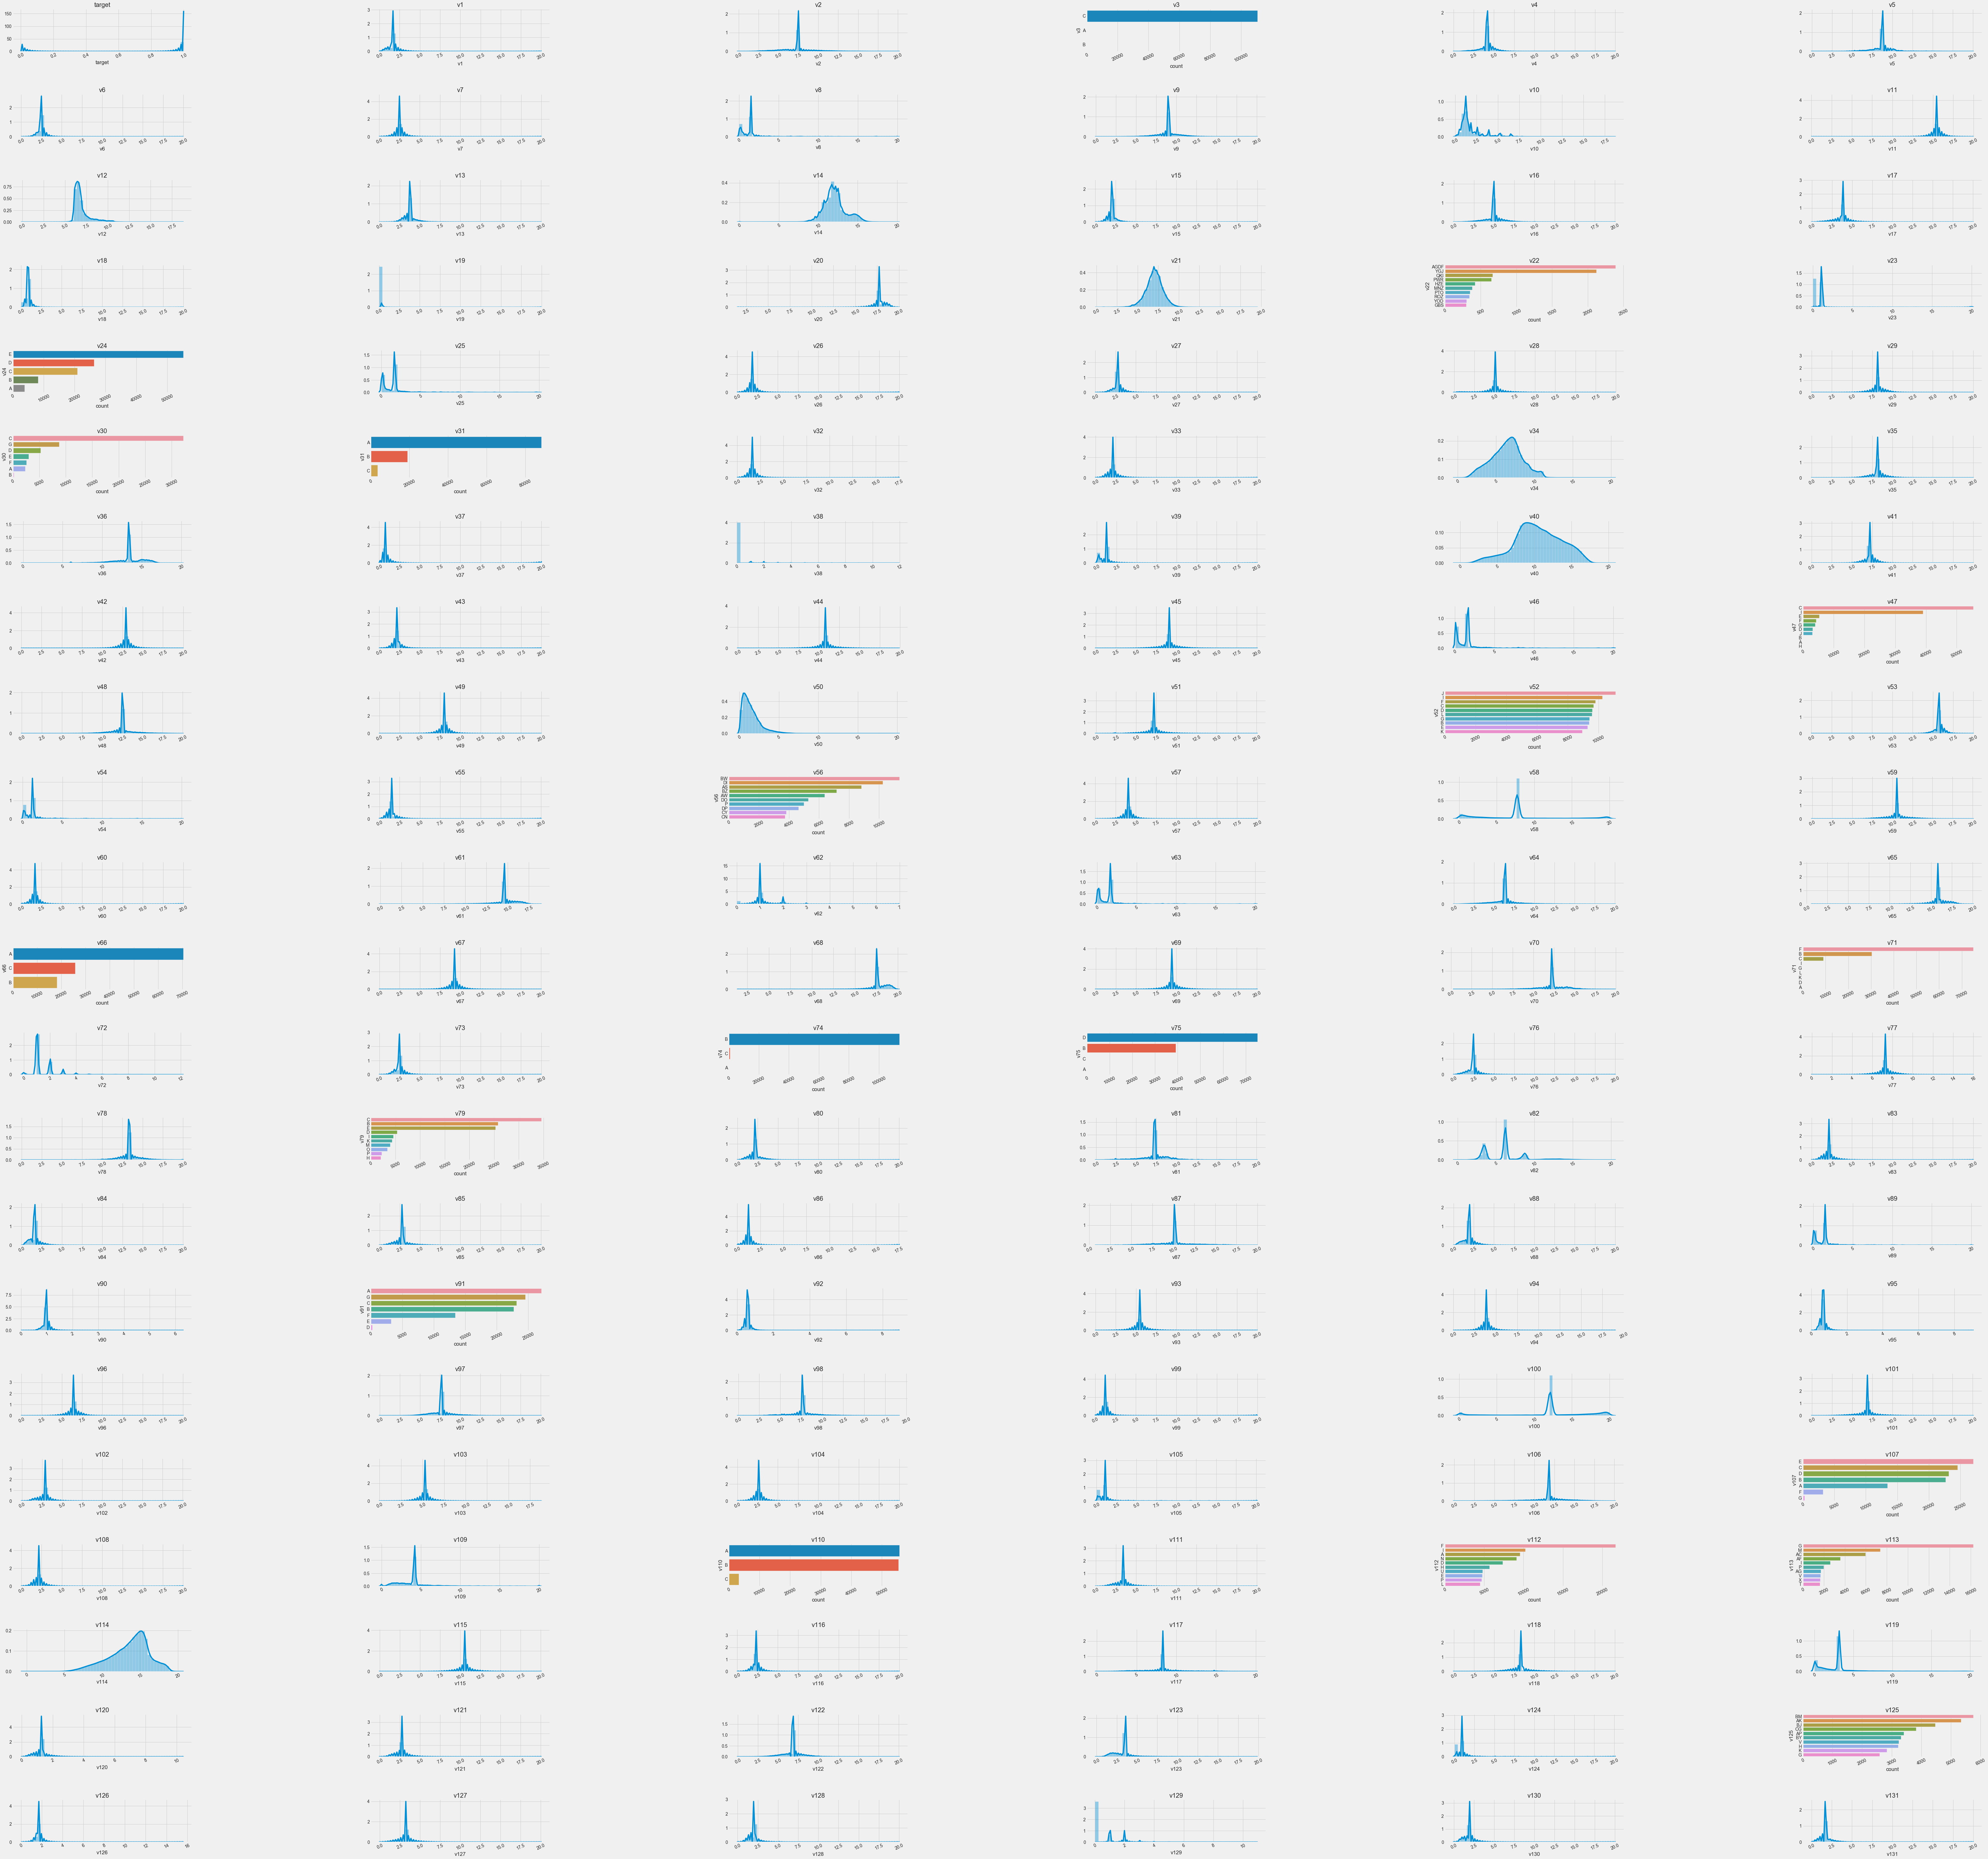

In [18]:
# Visualizando o grafico de distribuicao para cada feature (sao 132, entao é só uma amostra)
# Cada linha contem 6 features
columns_to_plot = []

for column in train:
    columns_to_plot.append(column)

plot_distribution(train[columns_to_plot], cols=6, width=100, height=100, hspace=1, wspace=1)